<a href="https://colab.research.google.com/github/aloiswirth/deep-learning-with-python-notebooks/blob/master/chapter03_introduction-to-keras-and-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [56]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [57]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [58]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 1.3155106 ]
 [-0.76348764]
 [ 0.8468969 ]], shape=(3, 1), dtype=float32)


In [59]:
x = tf.random.uniform(shape=(4, 2), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.5061643  0.01062191]
 [0.23046434 0.6383227 ]
 [0.54740334 0.38157535]
 [0.881686   0.09651017]], shape=(4, 2), dtype=float32)


**NumPy arrays are assignable**

In [60]:
import numpy as np
x = np.ones(shape=(2, 2))
x

array([[1., 1.],
       [1., 1.]])

In [61]:
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

**Creating a TensorFlow variable**

In [62]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.17731865],
       [-0.2991125 ],
       [ 1.5102823 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [63]:
v.assign(tf.ones((3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


**Assigning a value to a subset of a TensorFlow variable**

In [64]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [65]:
v.assign_sub(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [0.],
       [0.]], dtype=float32)>

In [66]:
v.assign_add(tf.random.normal(shape=(3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[ 2.9374044 ],
       [-0.3262156 ],
       [-0.75372607]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [67]:
a = 4 * tf.ones((2, 2))
b = tf.square(a)
print("b" +'\n', b)
c = tf.sqrt(a)
print("c" +'\n', c)
d = b + c
print("d" +'\n', d)
e = tf.matmul(a, b)
print("e" +'\n', e)
e *= d
print("e = new  e *=d " +'\n', e)

b
 tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)
c
 tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
d
 tf.Tensor(
[[18. 18.]
 [18. 18.]], shape=(2, 2), dtype=float32)
e
 tf.Tensor(
[[128. 128.]
 [128. 128.]], shape=(2, 2), dtype=float32)
e = new  e *=d 
 tf.Tensor(
[[2304. 2304.]
 [2304. 2304.]], shape=(2, 2), dtype=float32)


In [68]:
a = 4 * tf.random.normal((2, 2))
print("a" +'\n', a)
b = tf.square(a)
print("b" +'\n', b)
c = tf.sqrt(b)
print("c" +'\n', c)
d = b + c
print("d" +'\n', d)
e = tf.matmul(a, b)
print("e" +'\n', e)
e *= d
print("e = new  e *=d " +'\n', e)

a
 tf.Tensor(
[[-3.061845   1.9920328]
 [ 1.1196294 -2.864034 ]], shape=(2, 2), dtype=float32)
b
 tf.Tensor(
[[9.374895  3.9681945]
 [1.25357   8.20269  ]], shape=(2, 2), dtype=float32)
c
 tf.Tensor(
[[3.061845  1.9920328]
 [1.1196294 2.864034 ]], shape=(2, 2), dtype=float32)
d
 tf.Tensor(
[[12.43674    5.960227 ]
 [ 2.3731995 11.066724 ]], shape=(2, 2), dtype=float32)
e
 tf.Tensor(
[[-26.207323    4.19003  ]
 [  6.9061413 -19.049875 ]], shape=(2, 2), dtype=float32)
e = new  e *=d 
 tf.Tensor(
[[-325.93365   24.97353]
 [  16.38965 -210.8197 ]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [69]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)


In [70]:
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


**Using `GradientTape` with constant tensor inputs**

In [71]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using nested gradient tapes to compute second-order gradients**

In [72]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
    print("speed of inner_tape=", speed)
acceleration = outer_tape.gradient(speed, time)
print("speed=", speed)
print("acceleration=", acceleration)


speed of inner_tape= tf.Tensor(0.0, shape=(), dtype=float32)
speed= tf.Tensor(0.0, shape=(), dtype=float32)
acceleration= tf.Tensor(9.8, shape=(), dtype=float32)


#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [73]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [74]:
positive_samples

array([[ 1.44715295, -2.783325  ],
       [ 2.2259794 , -0.24325518],
       [ 3.25762139,  0.80811899],
       ...,
       [ 4.97233851,  1.77298462],
       [ 3.53338482,  0.14577857],
       [ 3.81196305,  0.38609989]])

**Stacking the two classes into an array with shape (2000, 2)**

In [75]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs

array([[-1.5908167 ,  2.7634766 ],
       [-1.5981271 ,  1.1428782 ],
       [ 0.88766897,  3.7972085 ],
       ...,
       [ 4.9723387 ,  1.7729846 ],
       [ 3.5333848 ,  0.14577857],
       [ 3.811963  ,  0.3860999 ]], dtype=float32)

In [76]:
inputs.ndim

2

**Generating the corresponding targets (0 and 1)**

In [77]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

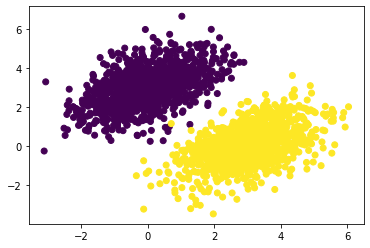

In [78]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [79]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [80]:
print(W)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.9337528],
       [0.640782 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


**The forward pass function**

In [81]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [82]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [83]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [84]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.5642
Loss at step 1: 1.0090
Loss at step 2: 0.2900
Loss at step 3: 0.1682
Loss at step 4: 0.1403
Loss at step 5: 0.1277
Loss at step 6: 0.1183
Loss at step 7: 0.1101
Loss at step 8: 0.1026
Loss at step 9: 0.0958
Loss at step 10: 0.0896
Loss at step 11: 0.0839
Loss at step 12: 0.0788
Loss at step 13: 0.0741
Loss at step 14: 0.0698
Loss at step 15: 0.0659
Loss at step 16: 0.0623
Loss at step 17: 0.0591
Loss at step 18: 0.0561
Loss at step 19: 0.0534
Loss at step 20: 0.0510
Loss at step 21: 0.0487
Loss at step 22: 0.0467
Loss at step 23: 0.0448
Loss at step 24: 0.0431
Loss at step 25: 0.0416
Loss at step 26: 0.0402
Loss at step 27: 0.0389
Loss at step 28: 0.0377
Loss at step 29: 0.0366
Loss at step 30: 0.0357
Loss at step 31: 0.0348
Loss at step 32: 0.0340
Loss at step 33: 0.0332
Loss at step 34: 0.0326
Loss at step 35: 0.0320
Loss at step 36: 0.0314
Loss at step 37: 0.0309
Loss at step 38: 0.0304
Loss at step 39: 0.0300


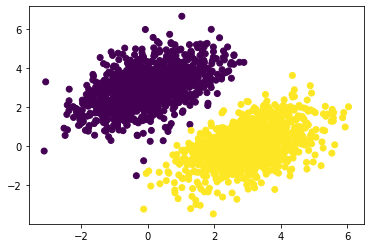

In [85]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

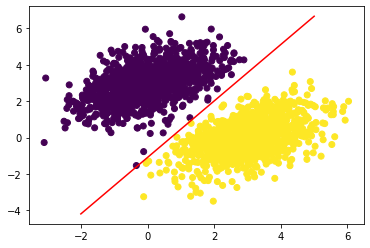

In [86]:
x = np.linspace(-2, 5, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [87]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [88]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
my_dense

In [89]:
input_tensor = tf.ones(shape=(2, 784))
input_tensor

<tf.Tensor: shape=(2, 784), dtype=float32, numpy=
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

In [90]:
output_tensor = my_dense(input_tensor)
print(output_tensor)
print(output_tensor.shape)

tf.Tensor(
[[0.         1.5986308  0.01301989 0.         1.3180233  0.
  0.         0.         0.05476832 2.5319326  0.         0.
  0.28440666 0.         0.23160553 0.         1.0207655  3.4715233
  0.         0.         0.8426539  1.3501254  0.         0.
  0.         0.0727728  0.         0.         1.1474864  0.2493189
  0.         0.33484036]
 [0.         1.5986308  0.01301989 0.         1.3180233  0.
  0.         0.         0.05476832 2.5319326  0.         0.
  0.28440666 0.         0.23160553 0.         1.0207655  3.4715233
  0.         0.         0.8426539  1.3501254  0.         0.
  0.         0.0727728  0.         0.         1.1474864  0.2493189
  0.         0.33484036]], shape=(2, 32), dtype=float32)
(2, 32)


#### Automatic shape inference: Building layers on the fly

In [91]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [92]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [93]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [94]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [95]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [98]:
history = model.fit(
    inputs,
    targets,
    epochs=10,
    batch_size=128
)

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 1.0290 - binary_accuracy: 0.7495
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.9139 - binary_accuracy: 0.7795
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.8075 - binary_accuracy: 0.8095
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7106 - binary_accuracy: 0.8380
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6230 - binary_accuracy: 0.8740
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.5444 - binary_accuracy: 0.9070
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4749 - binary_accuracy: 0.9325
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 0.4123 - binary_accuracy: 0.9630
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3572 - binary_accuracy: 0.9720
Epoch 10/10
16/16 [==============================] - 0s

In [99]:
history.history

{'loss': [1.0290330648422241,
  0.913897693157196,
  0.8075370192527771,
  0.7106413245201111,
  0.6230020523071289,
  0.5444400310516357,
  0.47493359446525574,
  0.4122830927371979,
  0.3572096824645996,
  0.30795615911483765],
 'binary_accuracy': [0.7494999766349792,
  0.7795000076293945,
  0.809499979019165,
  0.8379999995231628,
  0.8740000128746033,
  0.9070000052452087,
  0.9325000047683716,
  0.9629999995231628,
  0.972000002861023,
  0.9789999723434448]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [100]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=10,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/10
88/88 [==============================] - 1s 4ms/step - loss: 0.0929 - binary_accuracy: 0.9357 - val_loss: 0.0956 - val_binary_accuracy: 0.8900
Epoch 2/10
88/88 [==============================] - 0s 2ms/step - loss: 0.0676 - binary_accuracy: 0.9621 - val_loss: 0.0660 - val_binary_accuracy: 0.9900
Epoch 3/10
88/88 [==============================] - 0s 2ms/step - loss: 0.0794 - binary_accuracy: 0.9500 - val_loss: 0.0367 - val_binary_accuracy: 0.9967
Epoch 4/10
88/88 [==============================] - 0s 2ms/step - loss: 0.0655 - binary_accuracy: 0.9657 - val_loss: 0.1658 - val_binary_accuracy: 0.7667
Epoch 5/10
88/88 [==============================] - 0s 2ms/step - loss: 0.0737 - binary_accuracy: 0.9550 - val_loss: 0.0284 - val_binary_accuracy: 0.9983
Epoch 6/10
88/88 [==============================] - 0s 2ms/step - loss: 0.0768 - binary_accuracy: 0.9536 - val_loss: 0.0517 - val_binary_accuracy: 0.9733
Epoch 7/10
88/88 [==============================] - 0s 2ms/step - loss: 0.07

### Inference: Using a model after training

In [104]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:20])

5/5 [==============================] - 0s 2ms/step
[[ 0.19548422]
 [ 0.22545677]
 [-0.00872892]
 [-0.0649665 ]
 [ 0.02652532]
 [ 0.72375196]
 [-0.19897789]
 [ 0.29578257]
 [ 0.19862783]
 [ 0.42041552]
 [ 0.11034885]
 [-0.06899697]
 [ 0.06893668]
 [ 0.9489738 ]
 [ 0.23577148]
 [ 0.02849156]
 [ 0.90175486]
 [ 0.69489   ]
 [ 1.2726495 ]
 [ 0.06577098]]


In [105]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 [==============================] - 0s 2ms/step - loss: 0.0319 - binary_accuracy: 0.9950


## Summary